## Analysis and Plots

#### Libraries

In [1]:
#! rm *.jpg
#area.to_netcdf('/storage2/tkyeimiah/Obs/CIS/CIS_year/area_all_combined.nc')
#print('done !')

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.path as mpath
import matplotlib.patches as patches
import matplotlib.cm as cm
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import cartopy.mpl.gridliner as gridliner
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", message="All-NaN slice encountered")
%matplotlib inline
import time

In [3]:
start_time=time.time()

path = '/storage2/tkyeimiah'


aice_dh = xr.open_dataset(path+'/iHESP/EM1/hist/aice_hist/aice_hist.nc')
aice_dp = xr.open_dataset(path+'/iHESP/EM1/proj/aice_proj/aice_proj.nc')
hi_dh = xr.open_dataset(path+'/iHESP/EM1/hist/hi_hist/hi_hist.nc')
hi_dp = xr.open_dataset(path+'/iHESP/EM1/proj/hi_proj/hi_proj.nc')


end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

Execution time:  0.0 hours, 0.0 minutes, 1.09663987159729 seconds


### CESM-HR

In [4]:
aice_hist=aice_dh['aice']
aice_proj=aice_dp['aice']

tarea_hist=aice_dh['uarea']
tarea_proj=aice_dp['uarea']

In [5]:
# Define the Labrador coast boundaries (replace these with your desired region)
lon_min, lon_max =287, 315 #73W & 45W
lat_min, lat_max =51,69


# Create a mask for Labrador coast 
mask_hist = ((aice_hist.TLAT >= lat_min) & (aice_hist.TLAT <= lat_max) &
        (aice_hist.TLON >= lon_min) & (aice_hist.TLON <= lon_max))

mask_hist2 = ((tarea_hist.TLAT >= lat_min) & (tarea_hist.TLAT <= lat_max) &
        (tarea_hist.TLON >= lon_min) & (tarea_hist.TLON <= lon_max))

mask_proj = ((aice_proj.TLAT >= lat_min) & (aice_proj.TLAT <= lat_max) &
        (aice_proj.TLON >= lon_min) & (aice_proj.TLON <= lon_max))

mask_proj2 = ((tarea_proj.TLAT >= lat_min) & (tarea_proj.TLAT <= lat_max) &
        (tarea_proj.TLON >= lon_min) & (tarea_proj.TLON <= lon_max))

# Apply the mask to the aice variable
aice_hist_region_ =aice_hist.where(mask_hist, drop=True)
tarea_hist_region_=tarea_hist.where(mask_hist2, drop=True)
aice_proj_region_ =aice_proj.where(mask_proj, drop=True)
tarea_proj_region_=tarea_proj.where(mask_proj2, drop=True)

#### SIE

In [6]:
sic_greater_15hist = xr.where(aice_hist_region_ >= 15, 1, 0)
sic_greater_15proj = xr.where(aice_proj_region_ >= 15, 1, 0)

aice_hist_region = (sic_greater_15hist * tarea_hist_region_)/1e12
aice_proj_region = (sic_greater_15proj * tarea_proj_region_)/1e12

In [7]:
#plot for article
model_1990_99 = aice_hist_region.sel(time=slice('1990-01-01','1999-12-31'))
model_2000_06 = aice_hist_region.sel(time=slice('2000-01-01','2006-01-01'))
model_2007_20 = aice_proj_region.sel(time=slice('2006-02-01','2020-12-31'))
model_2000_20 = xr.concat([model_2000_06, model_2007_20], dim='time')
model_2040_60 = aice_proj_region.sel(time=slice('2040-01-01','2060-12-31'))
model_2080_100= aice_proj_region.sel(time=slice('2080-01-01','2100-12-31'))

In [8]:
model_1990_99_monthly = model_1990_99.groupby('time.month').mean('time').sum(('nj','ni'))
model_2000_20_monthly = model_2000_20.groupby('time.month').mean('time').sum(('nj','ni'))

model_1990_99_monmax = model_1990_99.groupby('time.month').max('time').sum(('nj','ni'))
model_2000_20_monmax = model_2000_20.groupby('time.month').max('time').sum(('nj','ni'))

model_1990_99_monmin = model_1990_99.groupby('time.month').min('time').sum(('nj','ni'))
model_2000_20_monmin = model_2000_20.groupby('time.month').min('time').sum(('nj','ni'))

#### SIC

In [9]:
#plot for article
model_sic_1990_99 = aice_hist_region_.sel(time=slice('1990-01-01','1999-12-31'))
model_sic_2000_06 = aice_hist_region_.sel(time=slice('2000-01-01','2006-01-01'))
model_sic_2007_20 = aice_proj_region_.sel(time=slice('2006-02-01','2020-12-31'))
model_sic_2000_20 = xr.concat([model_sic_2000_06, model_sic_2007_20], dim='time')
model_sic_2040_60 = aice_proj_region_.sel(time=slice('2040-01-01','2060-12-31'))
model_sic_2080_100= aice_proj_region_.sel(time=slice('2080-01-01','2100-12-31'))

In [10]:
model_hist=aice_hist_region_.sel(time=slice('1990-01-01','2006-01-01'))
model_proj=aice_proj_region_.sel(time=slice('2006-02-01','2020-12-31'))
model_CT_sel= xr.concat([model_hist, model_proj], dim='time')

#### SIT

In [11]:
hi_hist=hi_dh['hi']
hi_proj=hi_dp['hi']

In [12]:
# Define the Labrador coast boundaries (replace these with your desired region)
lon_min, lon_max =287, 315 #73W & 45W
lat_min, lat_max =51,69

# Create a mask for Labrador coast 
mask_hist3 = ((hi_hist.TLAT >= lat_min) & (hi_hist.TLAT <= lat_max) &
              (hi_hist.TLON >= lon_min) & (hi_hist.TLON <= lon_max))


mask_proj3 = ((hi_proj.TLAT >= lat_min) & (hi_proj.TLAT <= lat_max) &
              (hi_proj.TLON >= lon_min) & (hi_proj.TLON <= lon_max))

# Apply the mask to the aice variable
hi_hist_region=hi_hist.where(mask_hist3, drop=True)
hi_proj_region=hi_proj.where(mask_proj3, drop=True)

In [13]:
#plot for article
model_hi_1990_99 = hi_hist_region.sel(time=slice('1990-01-01','1999-12-31'))
model_hi_2000_06 = hi_hist_region.sel(time=slice('2000-01-01','2006-01-01'))
model_hi_2007_20 = hi_proj_region.sel(time=slice('2006-02-01','2020-12-31'))
model_hi_2000_20 = xr.concat([model_hi_2000_06, model_hi_2007_20], dim='time')
model_hi_2040_60 = hi_proj_region.sel(time=slice('2040-01-01','2060-12-31'))
model_hi_2080_100= hi_proj_region.sel(time=slice('2080-01-01','2100-12-31'))

In [14]:
model_hi_1990_99_monthly = model_hi_1990_99.groupby('time.month').mean('time').mean(('nj','ni'))
model_hi_2000_20_monthly = model_hi_2000_20.groupby('time.month').mean('time').mean(('nj','ni'))

model_hi_1990_99_monmax = model_hi_1990_99.groupby('time.month').max('time').mean(('nj','ni'))
model_hi_2000_20_monmax = model_hi_2000_20.groupby('time.month').max('time').mean(('nj','ni'))

model_hi_1990_99_monmin = model_hi_1990_99.groupby('time.month').min('time').mean(('nj','ni'))
model_hi_2000_20_monmin = model_hi_2000_20.groupby('time.month').min('time').mean(('nj','ni'))

### CESM2-LE

In [15]:
start_time=time.time()

Cesm_lr=xr.open_dataset(path+'/CESM2-LE/aice/EM_1001.nc')

end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

Execution time:  0.0 hours, 0.0 minutes, 0.10871577262878418 seconds


In [16]:
aice_lr=Cesm_lr['aice']
tarea_lr=Cesm_lr['uarea']

In [17]:
# Define the Labrador coast boundaries (replace these with your desired region)
lon_min, lon_max =287, 315 #73W & 45W
lat_min, lat_max =51,69

# Create a mask for Labrador coast 
mask_lr = ((aice_lr.TLAT >= lat_min) & (aice_lr.TLAT <= lat_max) &
        (aice_lr.TLON >= lon_min) & (aice_lr.TLON <= lon_max))

mask_lr2 = ((tarea_lr.TLAT >= lat_min) & (tarea_lr.TLAT <= lat_max) &
        (tarea_lr.TLON >= lon_min) & (tarea_lr.TLON <= lon_max))

# Apply the mask to the aice variable
aice_lr_region_ =aice_lr.where(mask_lr, drop=True)
tarea_lr_region_=tarea_lr.where(mask_lr2, drop=True)

#### SIE

In [18]:
sic_greater_lr_15 = xr.where(aice_lr_region_ >= 0.15, 1, 0)
aice_lr_region = (sic_greater_lr_15 * tarea_lr_region_)/1e12

## CIS

In [19]:
start_time=time.time()

area=xr.open_dataset(path+'/Obs/CIS/CIS_year/area_all_combined.nc')
obs=xr.open_dataset(path+'/Obs/CIS/CIS_year/CT_all_combined.nc')

end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

Execution time:  0.0 hours, 0.0 minutes, 0.1195368766784668 seconds


In [20]:
obs_CT=obs['CT']
obs_area=area['area']

In [21]:
lat_min, lat_max = 51, 69
lon_min, lon_max =-73, -45 

# Create a mask for Labrador coast 
maskobs = ((obs_CT.lat>= lat_min) & (obs_CT.lat <= lat_max) & (obs_CT.lon >= lon_min) & (obs_CT.lon<= lon_max))
maskobs1 = ((obs_area.lat>= lat_min) & (obs_area.lat <= lat_max) & (obs_area.lon >= lon_min) & (obs_area.lon<= lon_max))
obs_CT_region_ =obs_CT.where(maskobs, drop=True)
obs_area_region =obs_area.where(maskobs1, drop=True)

In [22]:
#renaming
obs_CT_resampled = obs_CT_region_.fillna(0)
obs_area_resampled = obs_area_region

#### SIE

In [23]:
#replacing all ice 15 % and above with 1 and less with 0
obs_greater_15 = xr.where(obs_CT_resampled >= 0.15, 1, 0)

#calculating the SIE
obs_CT_region=(obs_greater_15 * obs_area_resampled)/1e6

In [24]:
#sel
cis_1990_99 = obs_CT_region.sel(time=slice('1990', '1999'))
cis_2000_20 = obs_CT_region.sel(time=slice('2000', '2020'))

In [25]:
cis_1990_99_monthly = cis_1990_99.groupby('time.month').mean('time').sum(['rlat','rlon'])
cis_2000_20_monthly = cis_2000_20.groupby('time.month').mean('time').sum(['rlat','rlon'])

cis_1990_99_monmax = cis_1990_99.groupby('time.month').max('time').sum(['rlat','rlon'])
cis_2000_20_monmax = cis_2000_20.groupby('time.month').max('time').sum(['rlat','rlon'])

cis_1990_99_monmin = cis_1990_99.groupby('time.month').min('time').sum(['rlat','rlon'])
cis_2000_20_monmin = cis_2000_20.groupby('time.month').min('time').sum(['rlat','rlon'])

In [26]:
obs_1990_99 = obs_CT_region.sel(time=slice('1990', '1999'))
obs_2000_09 = obs_CT_region.sel(time=slice('2000', '2009'))
obs_2010_20 = obs_CT_region.sel(time=slice('2010', '2020'))

In [27]:
obs_1990_99_monthly = obs_1990_99.groupby('time.month').mean('time').sum(['rlat','rlon'])
obs_2000_09_monthly = obs_2000_09.groupby('time.month').mean('time').sum(['rlat','rlon'])
obs_2010_20_monthly = obs_2010_20.groupby('time.month').mean('time').sum(['rlat','rlon'])

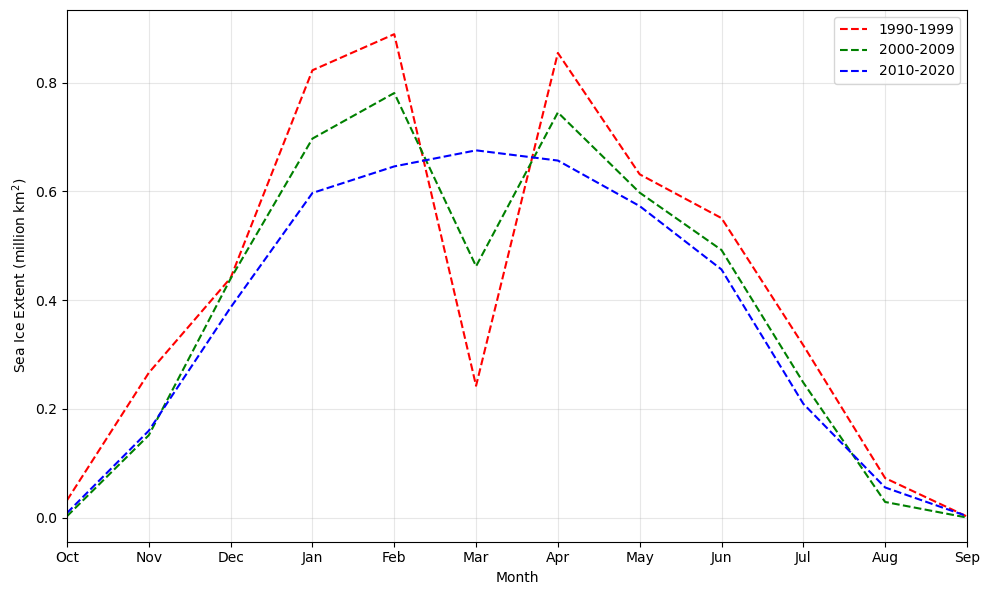

Execution time:  0.0 hours, 0.0 minutes, 0.9800291061401367 seconds


In [28]:
# Set xticks to represent months from January to December

start_time = time.time()

fig,ax=plt.subplots(figsize=(10,6.05))
#all_data = [ model_1990_99_monthly,model_2000_09_monthly, model_2010_19_monthly ]
all_data_a =[obs_1990_99_monthly, obs_2000_09_monthly ,obs_2010_20_monthly]
labels=['1990','2000','2010']


labels = ['1990-1999', '2000-2009', '2010-2020']

cmapp=['lime', 'darkgreen', 'salmon', 'cyan', 'magenta', 'yellow', 'coral', 'maroon', 
      'purple',  'navy', 'turquoise','beige', 'peachpuff', 'lightblue', 'red', 'green', 'blue',
      'gold', 'indigo', 'pink', 'olive','violet', 'brown', 'orange', 'black',]
colors=[cmapp[14], cmapp[15], cmapp[16]]

for i in range(len(all_data_a)):
    
    linestyle = '--'  # Default linestyle
    ax.plot(np.arange(12), np.append(all_data_a[i][9:],all_data_a[i][:9]), color=colors[i],  label=labels[i], linestyle=linestyle)
    

plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sep'])
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sea Ice Extent (million km$^2$)')
plt.grid(alpha=0.3)
plt.xlim(0,11)
plt.tight_layout()
#plt.savefig(path+'/plots/'+'plot1-new1.jpg', dpi=300, bbox_inches='tight')

plt.show()


end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

#### SIC

In [29]:
cis_sic_1990_99 = obs_CT_resampled.sel(time=slice('1990', '1999'))
cis_sic_2000_20 = obs_CT_resampled.sel(time=slice('2000', '2020'))

obs_CT_sel=obs_CT_resampled

In [30]:
obs_1990_99ct = obs_CT_sel.sel(time=slice('1990', '1999'))
obs_2000_09ct = obs_CT_sel.sel(time=slice('2000', '2009'))
obs_2010_20ct = obs_CT_sel.sel(time=slice('2010', '2020'))

In [31]:
obs_1990_99_monthlyct = obs_1990_99ct.groupby('time.month').mean('time').mean(['rlat','rlon'])
obs_2000_09_monthlyct = obs_2000_09ct.groupby('time.month').mean('time').mean(['rlat','rlon'])
obs_2010_20_monthlyct = obs_2010_20ct.groupby('time.month').mean('time').mean(['rlat','rlon'])

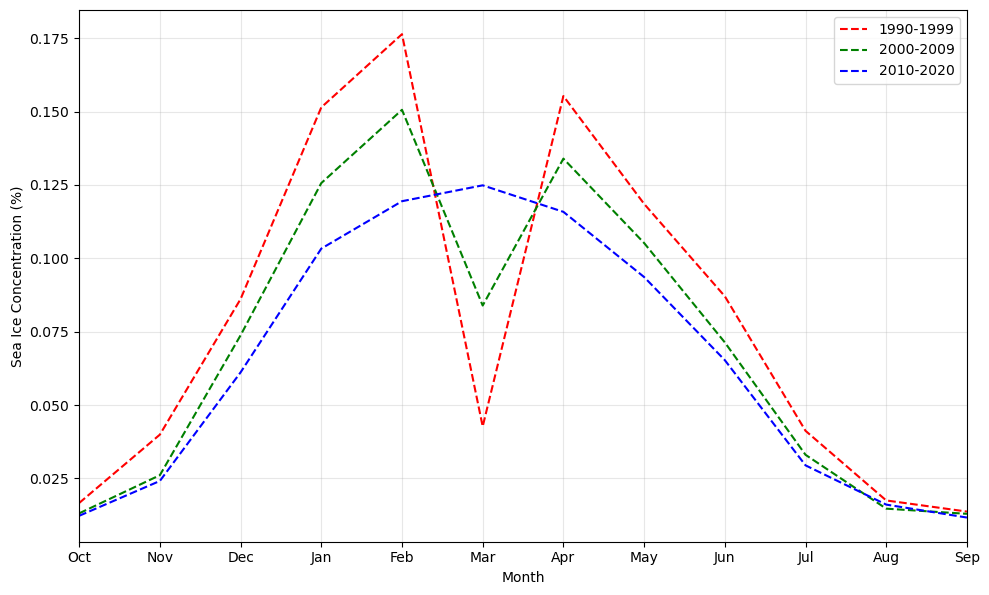

Execution time:  0.0 hours, 0.0 minutes, 0.20717930793762207 seconds


In [32]:
# Set xticks to represent months from January to December

start_time = time.time()

fig,ax=plt.subplots(figsize=(10,6.05))
#all_data = [ model_1990_99_monthly,model_2000_09_monthly, model_2010_19_monthly ]
all_data_a =[obs_1990_99_monthlyct, obs_2000_09_monthlyct ,obs_2010_20_monthlyct]
labels=['1990','2000','2010']


labels = ['1990-1999', '2000-2009', '2010-2020']

cmapp=['lime', 'darkgreen', 'salmon', 'cyan', 'magenta', 'yellow', 'coral', 'maroon', 
      'purple',  'navy', 'turquoise','beige', 'peachpuff', 'lightblue', 'red', 'green', 'blue',
      'gold', 'indigo', 'pink', 'olive','violet', 'brown', 'orange', 'black',]
colors=[cmapp[14], cmapp[15], cmapp[16]]

for i in range(len(all_data_a)):
    
    linestyle = '--'  # Default linestyle
    ax.plot(np.arange(12), np.append(all_data_a[i][9:],all_data_a[i][:9]), color=colors[i],  label=labels[i], linestyle=linestyle)
    

plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sep'])
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sea Ice Concentration (%)')
plt.grid(alpha=0.3)
plt.xlim(0,11)
plt.tight_layout()
#plt.savefig(path+'/plots/'+'plot1-new1.jpg', dpi=300, bbox_inches='tight')

plt.show()


end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

### PLOT SECTION

### Fig 2

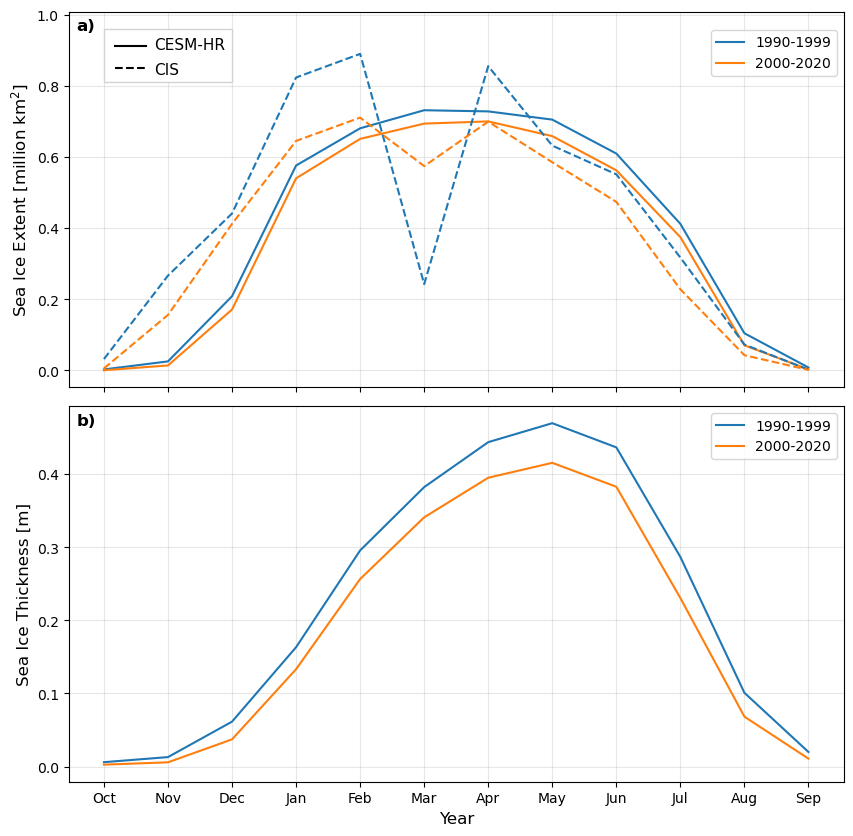

Execution time:  0.0 hours, 0.0 minutes, 0.3816103935241699 seconds


In [33]:
###article

start_time = time.time()
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

model_cis_dt = [model_1990_99_monthly, model_2000_20_monthly, cis_1990_99_monthly, cis_2000_20_monthly]
mc_data_mx= [model_1990_99_monmax, model_2000_20_monmax, cis_1990_99_monmax, cis_2000_20_monmax]
mc_data_mn= [model_1990_99_monmin, model_2000_20_monmin, cis_1990_99_monmin, cis_2000_20_monmin]

hi_dt =[model_hi_1990_99_monthly, model_hi_2000_20_monthly]
hi_data_mx =[model_hi_1990_99_monmax, model_hi_2000_20_monmax]
hi_data_mn =[model_hi_1990_99_monmin, model_hi_2000_20_monmin]


cl = ['tab:blue', 'tab:orange', 'tab:blue', 'tab:orange']
month_dt = ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep']
lb = ['1990-1999', '2000-2020']

# First plot
for i in range (len(model_cis_dt)):
    if i <2:
        ls='-'
        ax[0].plot(month_dt, np.append(model_cis_dt[i][9:], model_cis_dt[i][:9]), linestyle=ls, color=cl[i], label=lb[i])
        #ax[0].fill_between(month_dt, np.append(mc_data_mn[i][9:],mc_data_mn[i][:9]),
                           #np.append(mc_data_mx[i][9:],mc_data_mx[i][:9]),color=cl[i], alpha=0.03)
        ax[0].legend(loc='upper right', bbox_to_anchor=(1.0,0.97))
        
    if i >=2:
        ls='--'
        ax[0].plot(month_dt, np.append(model_cis_dt[i][9:], model_cis_dt[i][:9]), linestyle=ls, color=cl[i])
        #ax[0].fill_between(month_dt, np.append(mc_data_mn[i][9:],mc_data_mn[i][:9]),
                           #np.append(mc_data_mx[i][9:],mc_data_mx[i][:9]),color=cl[i], alpha=0.03)
        
    ax[0].set_ylabel('Sea Ice Extent [million km$^2$]', fontsize=12)
    ax[0].grid(alpha=0.3)
    
                 
# Second plot  
for i in range (len(hi_dt)):
    ls='-'
    ax[1].plot(month_dt, np.append(hi_dt[i][9:], hi_dt[i][:9]), linestyle=ls, color=cl[i], label=lb[i])
    #ax[1].fill_between(month_dt, np.append(hi_data_mn[i][9:],hi_data_mn[i][:9]),np.append(hi_data_mx[i][9:],hi_data_mx[i][:9]),
                       #color=cl[i], alpha=0.03)
    ax[1].legend(loc='upper right')
    ax[1].set_ylabel('Sea Ice Thickness [m]', fontsize=12)
    ax[1].set_xlabel('Year', fontsize=12)
    ax[1].grid(alpha=0.3)  

rectangle = patches.Rectangle((0.005, 0.81), 2, 0.15, edgecolor='lightgray',  facecolor='white',linewidth=1, zorder=10)
ax[0].add_patch(rectangle)

# Add CESM-HR text and line
ax[0].text(0.11, 0.9, 'CESM-HR', transform=ax[0].transAxes, fontsize=11, zorder=11)
ax[0].plot([0.06, 0.1], [0.91, 0.91], color='black', transform=ax[0].transAxes, linestyle='-', zorder=11)

# Add CIS text and dashed line
ax[0].text(0.11, 0.835, 'CIS', transform=ax[0].transAxes, fontsize=11, zorder=11)
ax[0].plot([0.06, 0.1], [0.85, 0.85], color='black', transform=ax[0].transAxes, linestyle='--', zorder=11)

    
ax[0].text(0.01, 0.95, 'a)',transform=ax[0].transAxes, fontweight='bold', fontsize=12)
ax[1].text(0.01, 0.95, 'b)',transform=ax[1].transAxes, fontweight='bold', fontsize=12)


plt.subplots_adjust(hspace=0.05)
plt.savefig('Fig2.jpg', dpi=300, bbox_inches='tight')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

### Fig 3

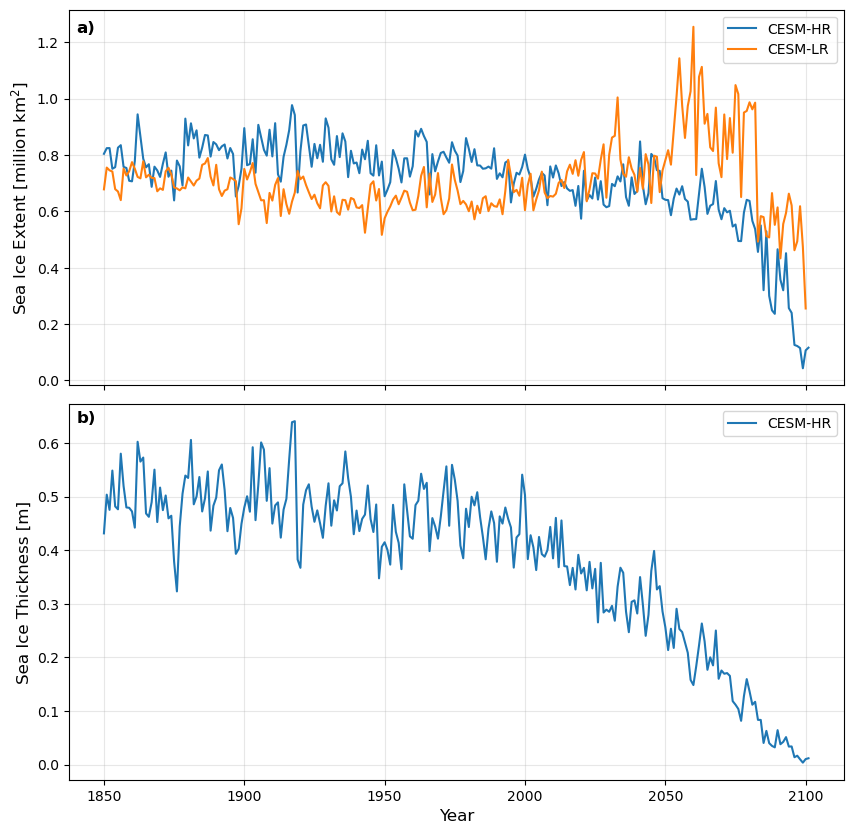

Execution time:  0.0 hours, 0.0 minutes, 1.1549749374389648 seconds


In [34]:
start_time = time.time()

april_aice_hist = aice_hist_region.sel(time=slice('1850','2100'))[2::12].sum(('nj', 'ni'))
april_aice_proj = aice_proj_region.sel(time=slice('1850','2100'))[2::12].sum(('nj', 'ni'))
april_aice=xr.concat([april_aice_hist,april_aice_proj], dim='time')

april_aice_lr = aice_lr_region.sel(time=slice('1850','2100'))[2::12].sum(('nj', 'ni'))

april_hi_hist = hi_hist_region.sel(time=slice('1850','2100'))[2::12].mean(('nj', 'ni'))
april_hi_proj = hi_proj_region.sel(time=slice('1850','2100'))[2::12].mean(('nj', 'ni'))
april_hi=xr.concat([april_hi_hist,april_hi_proj], dim='time')



fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
years =np.arange(1850,2102)
yearss =np.arange(1850,2101)

# First plot              
ax[0].plot(years, april_aice, label='CESM-HR')
ax[0].plot(yearss, april_aice_lr, label='CESM-LR')
#ax[0].plot(years, april_aice.rolling(time=10, center=True).mean())
ax[0].set_ylabel('Sea Ice Extent [million km$^2$]', fontsize=12)
ax[0].legend(loc='upper right')
ax[0].grid(alpha=0.3)
                 
# Second plot         
ax[1].plot(years, april_hi, label='CESM-HR')
#ax[1].plot(years, april_hi.rolling(time=10, center=True).mean())
ax[1].set_ylabel('Sea Ice Thickness [m]', fontsize=12)
ax[1].grid(alpha=0.3)
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Year', fontsize=12)

ax[0].text(0.01, 0.94, 'a)',transform=ax[0].transAxes, fontweight='bold', fontsize=12)
ax[1].text(0.01, 0.95, 'b)',transform=ax[1].transAxes, fontweight='bold', fontsize=12)

plt.subplots_adjust(hspace=0.05)
plt.savefig('Fig3.jpg', dpi=300, bbox_inches='tight')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")


### Fig 4

In [35]:
model_sic_1990_99_=model_sic_1990_99[3::12].mean('time')
model_sic_2000_20_=model_sic_2000_20[3::12].mean('time')
model_sic_2040_60_=model_sic_2040_60[3::12].mean('time')
model_sic_2080_100_=model_sic_2080_100[3::12].mean('time')
cis_sic_1990_99_=cis_sic_1990_99[3::12].mean('time')*100
cis_sic_2000_20_=cis_sic_2000_20[3::12].mean('time')*100

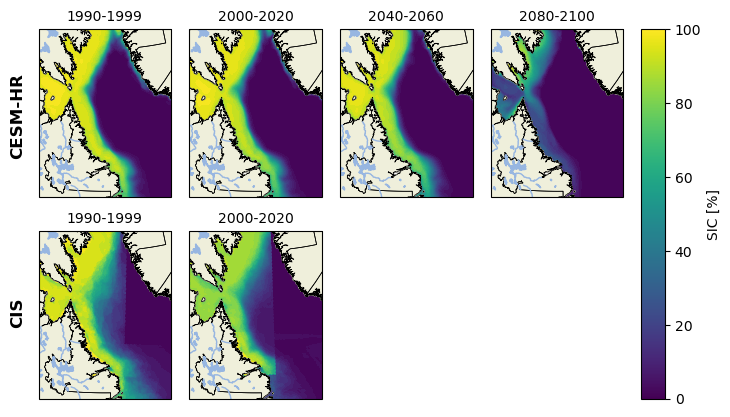

Execution time:  0.0 hours, 0.0 minutes, 25.195891618728638 seconds


In [36]:
#=========sic_region==max========================

fig = plt.figure(figsize=(8,4.8))
sic_data = [model_sic_1990_99_, model_sic_2000_20_, model_sic_2040_60_, model_sic_2080_100_,
                 cis_sic_1990_99_, cis_sic_2000_20_]

#hi_data1 = [model_hi_1990_99, model_hi_2000_20, model_hi_2040_60, model_hi_2080_100]
titles = ['1990-1999', '2000-2020', '2040-2060', '2080-2100', '1990-1999', '2000-2020']


norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)


x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(sic_data):
#for i in range(3):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(2,4, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    #ax.text(0,1.05,letter[i], transform=ax.transAxes, fontsize=9)
    
   
    if i in [0,1,2,3]:
        contf=ax.contourf(sic_data[i].TLON, sic_data[i].TLAT, sic_data[i],
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
    if i in [4,5]:
        contf=ax.contourf(sic_data[i].lon, sic_data[i].lat, sic_data[i],
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
    
    
cbar_ax = fig.add_axes([0.9, 0.11, 0.03, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC [%]')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC [%]', fontsize=10)  

name=['CESM-HR','CIS']
x=[0.13,0.13]
y=[0.7,0.29]
for i in range (2):
    fig.text(x[i],y[i], name[i], fontweight='bold',va='bottom', ha='center', rotation='vertical',
             rotation_mode='anchor',fontsize=12)
plt.subplots_adjust(wspace=-0.1)
#plt.subplots_adjust(hspace=0.7)
#plt.savefig('Fig4.jpg',dpi=300, bbox_inches='tight')
plt.show()


end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
    
    
    

plt.show()

### Fig 5

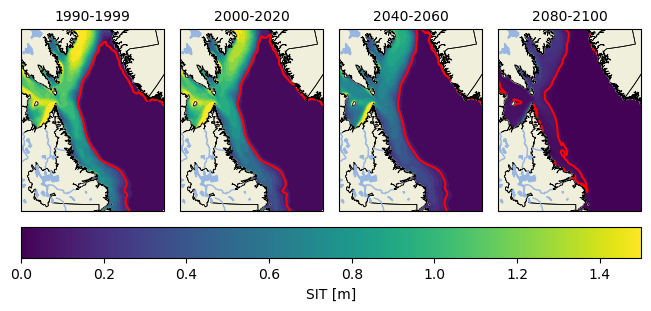

Execution time:  0.0 hours, 0.0 minutes, 31.8222758769989 seconds


In [37]:
#=========sic_region==max========================

fig = plt.figure(figsize=(8,2.4))
sic_data = [model_sic_1990_99_, model_sic_2000_20_, model_sic_2040_60_, model_sic_2080_100_]

hi_data1 = [model_hi_1990_99, model_hi_2000_20, model_hi_2040_60, model_hi_2080_100]
titles = ['1990-1999', '2000-2020', '2040-2060', '2080-2100',]

global_min = np.min([np.nanmin(data.max('time').values) for data in hi_data1])
#global_max = np.max([np.nanmax(data.max('time').values) for data in hi_data1])
norm = plt.Normalize(vmin=global_min, vmax=1.5)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67
  
# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(sic_data):
#for i in range(3):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(1,4, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    #ax.text(0,1.05,letter[i], transform=ax.transAxes, fontsize=9)
    
   
    ax.contourf(hi_data1[i].TLON, hi_data1[i].TLAT, hi_data1[i][3::12].mean('time'),levels=45, norm=norm, transform=ccrs.PlateCarree())
    ax.contour(sic_data[i].TLON, sic_data[i].TLAT, sic_data[i],levels=[15],norm=norm,colors='red',linewidth=5,transform=ccrs.PlateCarree())
    #if i in [4,5]:
        #contf=ax.contourf(sic_data[i].lon, sic_data[i].lat, sic_data[i],
                          #levels=45, norm=norm, transform=ccrs.PlateCarree())
    
    
cbar_ax = fig.add_axes([0.125, -0.08, 0.775, 0.13])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='horizontal', label='SIT [m]')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIT [m]', fontsize=10)  


plt.subplots_adjust(wspace=0.11)
#plt.subplots_adjust(hspace=0.7)
#plt.savefig('Fig5.jpg',dpi=300, bbox_inches='tight')
plt.show()


end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
    
    
    

plt.show()

### Fig 6

In [38]:
hi_month_1990_2005=hi_hist_region.sel(time=slice('1990-01-01','2006-01-01'))
hi_month_2006_2020=hi_proj_region.sel(time=slice('2006-02-01','2020-12-31'))
hi_region_1990_2020=xr.concat((hi_month_1990_2005,hi_month_2006_2020 ), dim='time')
hi_months=hi_region_1990_2020.groupby('time.month').mean('time')

In [39]:
#plot for article
sic_month_1990_2005 = aice_hist_region_.sel(time=slice('1990-01-01','2006-01-01'))
sic_month_2006_2020 = aice_proj_region_.sel(time=slice('2006-02-01','2020-12-31'))
sic_region_1990_2020= xr.concat([sic_month_1990_2005, sic_month_2006_2020], dim='time')
sic_months=sic_region_1990_2020.groupby('time.month').mean('time')

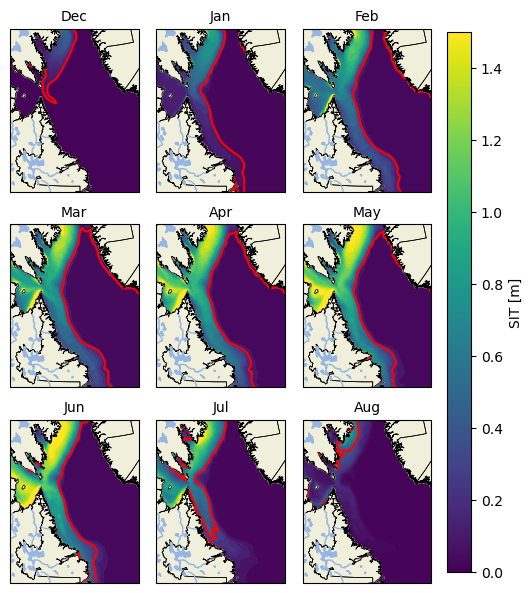

In [40]:
fig = plt.figure(figsize=(6, 7.2))

selected_data= [hi_months[11], hi_months[0], hi_months[1], hi_months[2], hi_months[3], hi_months[4], hi_months[5], hi_months[6],hi_months[7]]
selected_data1=[sic_months[11],sic_months[0],sic_months[1],sic_months[2],sic_months[3], sic_months[4], sic_months[5],sic_months[6],sic_months[7]]


titles = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug']
#name=['a)','b)','c)','d)','e)','f)','g)','h)','i)']

global_min = np.min([np.nanmin(data.values) for data in selected_data])
global_max = np.max([np.nanmax(data.values) for data in selected_data])
norm = plt.Normalize(vmin=global_min, vmax=1.5)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67


# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(3,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    #ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i], levels=45, norm=norm,
                   transform=ccrs.PlateCarree(), )
    ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i], levels=[15], norm=norm, colors='red',
               linewidth=5, transform=ccrs.PlateCarree())
    
cbar_ax = fig.add_axes([0.89, 0.125, 0.04, 0.75])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIT [m]', fontsize=10)  

plt.subplots_adjust(wspace=-0.15)
#plt.savefig('Fig6.jpg',dpi=300, bbox_inches='tight')
plt.show()

### Fig 7

In [41]:
model_SIE_hist =aice_hist_region.sel(time=slice('1990-01-01','2006-01-01'))
model_SIE_proj =aice_proj_region.sel(time=slice('2006-02-01','2020-12-31'))
model_SIE= xr.concat([model_SIE_hist, model_SIE_proj], dim='time')

obs_SIE=obs_CT_region

model_SIE_april=model_SIE[3::12].sum(('nj', 'ni'))
obs_SIE_april=obs_SIE[3::12].sum(['rlat','rlon'])

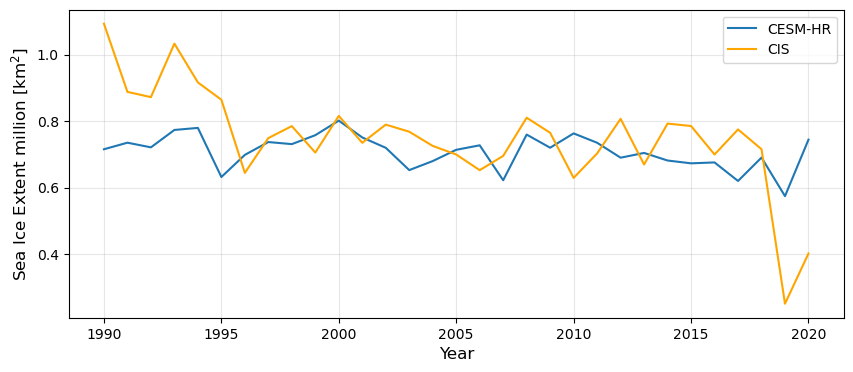

Execution time:  0.0 hours, 0.0 minutes, 0.13634562492370605 seconds


In [42]:
#Plot of the obs and model from 1990 to 2018
fig, ax=plt.subplots(figsize=(10,4))
start_time=time.time()

ax.plot(np.arange(1990,2021), model_SIE_april, label='CESM-HR')
ax.plot(np.arange(1990,2021), obs_SIE_april, color='orange', label='CIS')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Sea Ice Extent million [km$^2$]', fontsize=12)
ax.legend()
ax.grid(alpha=0.3)
#plt.xlim(1990,2019)
#plt.savefig('Fig7.jpg',dpi=300, bbox_inches='tight') 
plt.show()


end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

### Fig 8

In [43]:
#----------
obs_CT_1990_99 = obs_CT_sel.sel(time=slice('1990', '1999'))
obs_CT_2000_09 = obs_CT_sel.sel(time=slice('2000', '2009'))
obs_CT_2010_20 = obs_CT_sel.sel(time=slice('2010', '2020'))

#----------
model_CT_1990_99 = model_CT_sel.sel(time=slice('1990', '1999'))
model_CT_2000_09 = model_CT_sel.sel(time=slice('2000', '2009'))
model_CT_2010_20 = model_CT_sel.sel(time=slice('2010', '2020'))

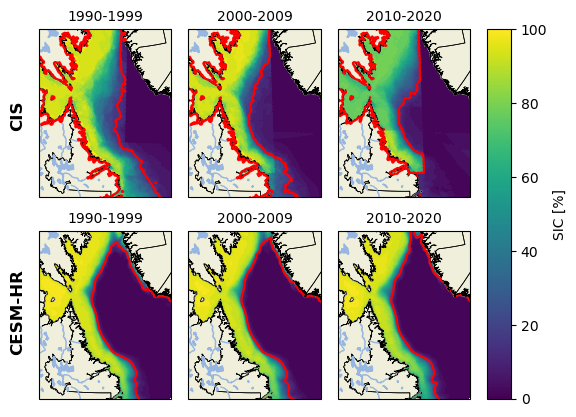

Execution time:  0.0 hours, 0.0 minutes, 20.75596523284912 seconds


In [44]:
start_time = time.time()

# Create a figure with two# Create a figure with two subplots
fig = plt.figure(figsize=(6,4.8))

selected_data=[obs_CT_1990_99,obs_CT_2000_09, obs_CT_2010_20, model_CT_1990_99, model_CT_2000_09,model_CT_2010_20]
titles=['1990-1999', '2000-2009','2010-2020','1990-1999', '2000-2009','2010-2020']
#letter=['a)','b)','c)','d)','e)','f)']
norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)


x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
#for i in range(3):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(2,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    #ax.text(0,1.05,letter[i], transform=ax.transAxes, fontsize=9)
    
    if i in [0,1,2]:
        ax.contourf(selected_data[i].lon, selected_data[i].lat, selected_data[i][3::12].mean('time')*100,
                    norm=norm, levels=45, transform=ccrs.PlateCarree())
        ax.contour(selected_data[i].lon, selected_data[i].lat, selected_data[i][3::12].mean('time')*100, 
                   levels=[15], norm=norm, colors='red', linewidth=5, transform=ccrs.PlateCarree())
    
    if i in [3,4,5]:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time'),
                    norm=norm, levels=45, transform=ccrs.PlateCarree())
        ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time'), 
                   levels=[15], norm=norm, colors='red',linewidth=5, transform=ccrs.PlateCarree())

    
cbar_ax = fig.add_axes([0.9, 0.11, 0.04, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC [%]', fontsize=10)  

name=['CIS', 'CESM-HR']
x=[0.13,0.13]
y=[0.7,0.29]
for i in range (2):
    fig.text(x[i],y[i], name[i], fontweight='bold',va='bottom', ha='center', rotation='vertical',
             rotation_mode='anchor',fontsize=12)
plt.subplots_adjust(wspace=-0.1)
#plt.subplots_adjust(hspace=0.7)
#plt.savefig('Fig8.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

### Fig 9

In [45]:
obs_months=obs_CT_sel.groupby('time.month').mean('time')
model_months=model_CT_sel.groupby('time.month').mean('time')

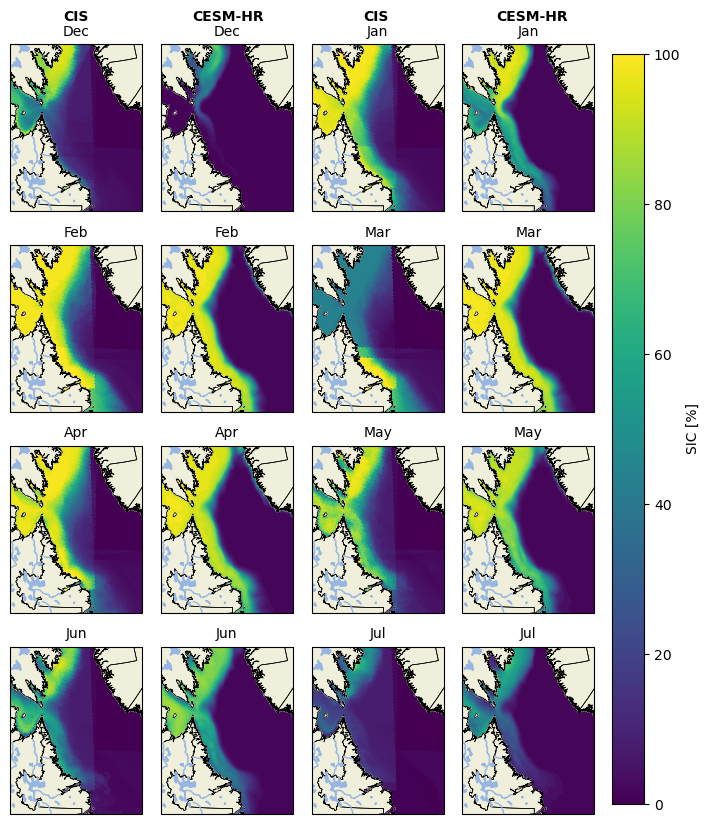

Execution time:  0.0 hours, 0.0 minutes, 15.954944372177124 seconds


In [46]:
start_time = time.time()
#fig = plt.figure(figsize=(8, 4.8))
fig = plt.figure(figsize=(8,10))
obs_data=[obs_months[11], obs_months[0],obs_months[1],obs_months[2],obs_months[3],obs_months[4],
          obs_months[5],obs_months[6]]

model_data=[model_months[11],model_months[0],model_months[1],model_months[2],model_months[3],model_months[4],
            model_months[5],model_months[6]]

titles = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul',]
#name=['a)','c)','e)','g)','i)','k)','m)','o)','q)']
#name1=['b)','d)','f)','h)','j)','l)','n)','p)','r)']

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i in range(16):
    index = i // 2 
    
    if i % 2 == 0:
        ax = plt.subplot(4, 4, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon,
                                                                     central_latitude=c_lat,
                                                                     standard_parallels=(y0, y1)))
        ax.set_title(titles[index], fontsize=10)
        ax.add_feature(cfeature.LAND, zorder=2)
        ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5, zorder=2)
        ax.add_feature(cfeature.LAKES.with_scale('10m'), zorder=2)
        ax.add_feature(cfeature.RIVERS.with_scale('10m'), zorder=2)
        ax.set_extent([x0, x1, y0, y1])
        ax.pcolormesh(obs_data[index].lon, obs_data[index].lat, obs_data[index]*100, 
                    vmax=90, transform=ccrs.PlateCarree())
        #ax.text(0,1.05,name[index], transform=ax.transAxes, fontsize=10)
        
    else:
        ax = plt.subplot(4, 4, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon,
                                                                     central_latitude=c_lat,
                                                                     standard_parallels=(y0, y1)))
        if index < len(model_data):
            ax.set_title(titles[index], fontsize=10)
            ax.add_feature(cfeature.LAND, zorder=2)
            ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5, zorder=2)
            ax.add_feature(cfeature.LAKES.with_scale('10m'), zorder=2)
            ax.add_feature(cfeature.RIVERS.with_scale('10m'), zorder=2)
            ax.set_extent([x0, x1, y0, y1])
            ax.contourf(model_data[index].TLON, model_data[index].TLAT, model_data[index], levels=45,
                        norm=norm, transform=ccrs.PlateCarree())
            #ax.text(0,1.05,name1[index], transform=ax.transAxes, fontsize=10)

cbar_ax = fig.add_axes([0.9, 0.12, 0.04, 0.75])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC [%]')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC [%]', fontsize=10)

name=['CIS', 'CESM-HR','CIS', 'CESM-HR']
x=[0.23, 0.42, 0.605, 0.8]
y=[0.9,0.9,0.9,0.9]
for i in range (4):
    fig.text(x[i],y[i], name[i], fontweight='bold',va='bottom', ha='center', rotation='horizontal',
             rotation_mode='anchor',fontsize=10)


plt.subplots_adjust(wspace=-0.1)
#plt.savefig('Fig9.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

In [ ]:
#landfast ice
#cis and cesm